Productivity with pandas
==============================
![](http://pandas.pydata.org/_static/pandas_logo.png)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#unique---find-unique-rows" data-toc-modified-id="unique---find-unique-rows-1">unique - find unique rows</a></span><ul class="toc-item"><li><span><a href="#nunique---find-number-of-unique-rows" data-toc-modified-id="nunique---find-number-of-unique-rows-1.1">nunique - find number of unique rows</a></span></li><li><span><a href="#value_counts---find-unique-values-and-number-of-occurrences" data-toc-modified-id="value_counts---find-unique-values-and-number-of-occurrences-1.2">value_counts - find unique values and number of occurrences</a></span></li></ul></li><li><span><a href="#apply---batch-process-column-values" data-toc-modified-id="apply---batch-process-column-values-2">apply - batch process column values</a></span></li><li><span><a href="#sort_values---sorting-rows" data-toc-modified-id="sort_values---sorting-rows-3">sort_values - sorting rows</a></span></li><li><span><a href="#isnull---finding-null-values-throughout-the-DataFrame" data-toc-modified-id="isnull---finding-null-values-throughout-the-DataFrame-4">isnull - finding null values throughout the DataFrame</a></span></li><li><span><a href="#Working-with-time-series-data" data-toc-modified-id="Working-with-time-series-data-5">Working with time series data</a></span><ul class="toc-item"><li><span><a href="#Plotting-time-series" data-toc-modified-id="Plotting-time-series-5.1">Plotting time series</a></span></li><li><span><a href="#Sort-dataframe-by-time" data-toc-modified-id="Sort-dataframe-by-time-5.2">Sort dataframe by time</a></span></li><li><span><a href="#Add-a-counter-column-to-the-dataframe" data-toc-modified-id="Add-a-counter-column-to-the-dataframe-5.3">Add a counter column to the dataframe</a></span></li></ul></li></ul></div>

## unique - find unique rows
Find unique rows in dataset

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
comp_data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

comp_df = pd.DataFrame(comp_data)
comp_df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [3]:
# find unique company names
comp_df['Company'].unique()

array(['GOOG', 'MSFT', 'FB'], dtype=object)

### nunique - find number of unique rows
More efficient than finding the unique array and finding the length of it.

In [4]:
comp_df['Company'].nunique()

3

### value_counts - find unique values and number of occurrences

In [5]:
comp_df['Company'].value_counts()

GOOG    2
FB      2
MSFT    2
Name: Company, dtype: int64

## apply - batch process column values
Calling the apply() is similar to calling the `map()` in Python. It can apply an operation on all records of a selected column. For instance, to find the squared sales, do the following

In [6]:
comp_df['sq_sales'] = comp_df['Sales'].apply(lambda x:x*x)
comp_df

,Company,Person,Sales,sq_sales
0,GOOG,Sam,200,40000
1,GOOG,Charlie,120,14400
2,MSFT,Amy,340,115600
3,MSFT,Vanessa,124,15376
4,FB,Carl,243,59049
5,FB,Sarah,350,122500


We can also define a function and call that within the `apply()` method. This can accept values of one or more columns to calculate a new column.

In [9]:
def cuber(row):
    return row['Sales'] * row['sq_sales']

comp_df['cu_sales'] = comp_df.apply(cuber, axis=1) 
#note - how the function is called as an obj
# note - how I need to set axis to 1, instead of 0 which is defualt.
comp_df

,Company,Person,Sales,sq_sales,cu_sales
0,GOOG,Sam,200,40000,8000000
1,GOOG,Charlie,120,14400,1728000
2,MSFT,Amy,340,115600,39304000
3,MSFT,Vanessa,124,15376,1906624
4,FB,Carl,243,59049,14348907
5,FB,Sarah,350,122500,42875000


## sort_values - sorting rows

In [10]:
comp_df.sort_values('Sales')

,Company,Person,Sales,sq_sales,cu_sales
1,GOOG,Charlie,120,14400,1728000
3,MSFT,Vanessa,124,15376,1906624
0,GOOG,Sam,200,40000,8000000
4,FB,Carl,243,59049,14348907
2,MSFT,Amy,340,115600,39304000
5,FB,Sarah,350,122500,42875000


Note how the index remains attached to the original rows.

In [12]:
#sorting along multiple columns
comp_df.sort_values(['Company','Sales'])

,Company,Person,Sales,sq_sales,cu_sales
4,FB,Carl,243,59049,14348907
5,FB,Sarah,350,122500,42875000
1,GOOG,Charlie,120,14400,1728000
0,GOOG,Sam,200,40000,8000000
3,MSFT,Vanessa,124,15376,1906624
2,MSFT,Amy,340,115600,39304000


## isnull - finding null values throughout the DataFrame

In [13]:
comp_df.isnull()

,Company,Person,Sales,sq_sales,cu_sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False


## Working with time series data
This section explains how to specify datatypes of columns while reading data and how to define column converters to ease certain data types.

In [23]:
registrant_df = pd.read_csv('./registrant.csv')
registrant_df.head()

,Unnamed: 0,Registration Date,Country,Organization,Current customer?,What would you like to learn?
0,0,11/08/2019 06:09 PM EST,Jamaica,The University of the West Indies,NaN,NaN
1,1,11/08/2019 06:09 PM EST,Japan,"iLand6 Co.,Ltd.",no,I am interested ArcGIS.
2,2,11/08/2019 05:56 PM EST,Canada,Safe Software Inc,yes,data science workflos
3,3,11/08/2019 05:51 PM EST,Canada,Le Groupe GeoInfo Inc,yes,general information
4,4,11/08/2019 05:26 PM EST,Canada,Safe Software Inc.,NaN,NaN


The `Registration Date` should be of type `datetime` and the `Current customer?` should be of `bool`. However, are they?

In [24]:
registrant_df.dtypes

Unnamed: 0                        int64
Registration Date                object
Country                          object
Organization                     object
Current customer?                object
What would you like to learn?    object
dtype: object

Everything is a generic `object`. Let us re-read, this time knowing what their data types should be.

In [25]:
# define a function (lambda in this case) which will convert a column to bool depending on the 
# value of the cell
convertor_fn = lambda x: x in ['Yes', 'yes', 'YES']
convertor_map = {'Current customer?': convertor_fn}

# re-read data
registrant_df2 = pd.read_csv('./registrant.csv', 
                             parse_dates=['Registration Date'], 
                             converters = convertor_map)

registrant_df2.dtypes

/Users/atma6951/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/atma6951/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Unnamed: 0                                int64
Registration Date                datetime64[ns]
Country                                  object
Organization                             object
Current customer?                          bool
What would you like to learn?            object
dtype: object

### Plotting time series
Now that the Registration date is datetime, we can plot the number of registrants by time. But before that, we need to **set it as the index**.

In [26]:
registrant_df2.set_index('Registration Date', inplace=True)
registrant_df2.drop(axis=1, columns=['Unnamed: 0'], inplace=True) # drop bad column
registrant_df2.head()

,Country,Organization,Current customer?,What would you like to learn?
Registration Date,,,,
2019-11-08 18:09:00,Jamaica,The University of the West Indies,False,NaN
2019-11-08 18:09:00,Japan,"iLand6 Co.,Ltd.",False,I am interested ArcGIS.
2019-11-08 17:56:00,Canada,Safe Software Inc,True,data science workflos
2019-11-08 17:51:00,Canada,Le Groupe GeoInfo Inc,True,general information
2019-11-08 17:26:00,Canada,Safe Software Inc.,False,NaN


### Sort dataframe by time

In [30]:
registrant_df2.sort_index(inplace=True)

### Add a counter column to the dataframe
Note. It is important to count up only after sorting. Else the numbers are going to be all over the place.

In [31]:
registrant_df2['registration_count'] = range(1, len(registrant_df2)+1) # goes from 1 to 284

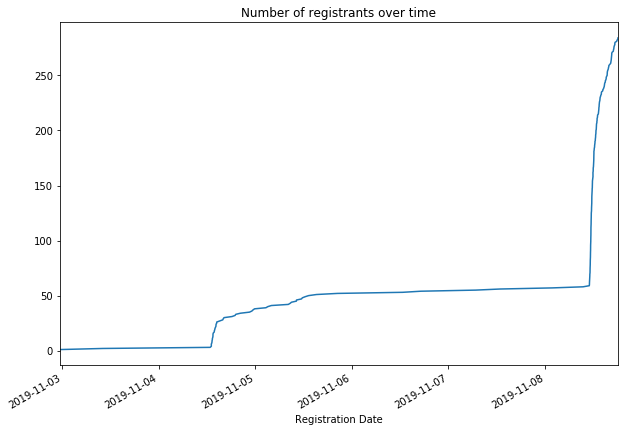

In [32]:
plt.figure(figsize=(10,7))
registrant_df2['registration_count'].plot(kind='line')
plt.title('Number of registrants over time');